In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Image gradient

## **Bộ lọc đạo hàm bậc 1**

+ Phát hiện biên

### Bô lọc Robert Cross Gradient

--------------------------------------------------------------------------------







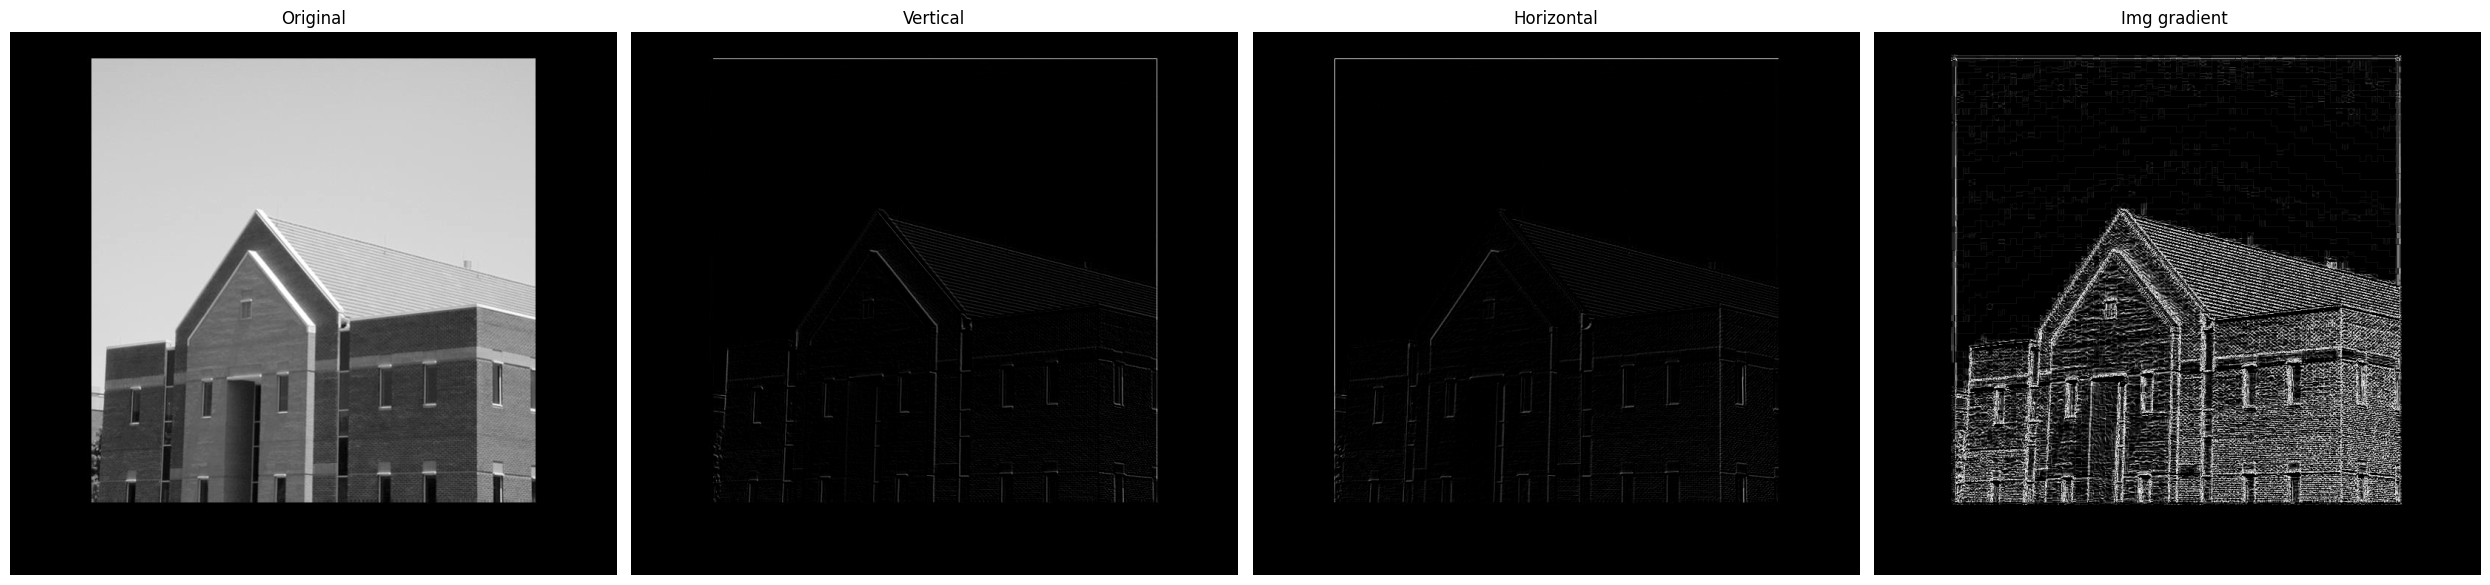

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/Testbuilding.jpg',cv2.IMREAD_GRAYSCALE)

robert_cross_1 = np.array([[-1,0],
                     [0,1]])

robert_cross_2 = np.array([[0,-1],
                     [1,0]])

vertical = cv2.filter2D(img, -1, robert_cross_1)
horizontal = cv2.filter2D(img, -1, robert_cross_2)

# ket hop hai huong

img_gradient = np.sqrt(np.square(horizontal) + np.square(vertical))

rs_y = np.clip(img_gradient, 0, 255)

rs_y = rs_y.astype('uint8')

fx,ax = plt.subplots(1,4, figsize=(25,30))

ax[0].set_title('Original')
ax[1].set_title('Vertical')
ax[2].set_title('Horizontal')
ax[3].set_title('Img gradient ')
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(horizontal,cmap = 'gray')
ax[2].imshow(vertical, cmap = 'gray')
ax[3].imshow(rs_y, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()
plt.show()


- sử dụng bộ lọc robert, cắt ngưỡng


---



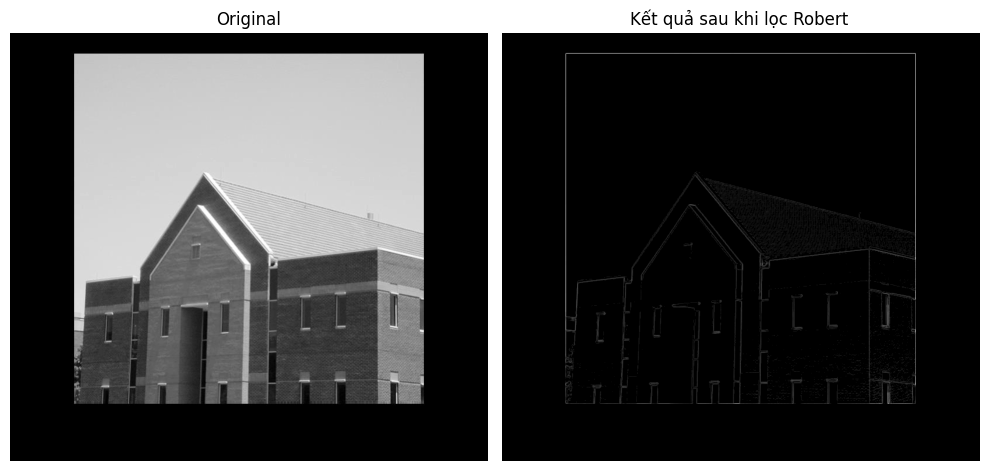

In [ ]:
img1= cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/Testbuilding.jpg',cv2.IMREAD_GRAYSCALE)

kernel_x = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,-1]],np.float32)

kernel_y = np.array([[0,0,0],
                     [0,0,1],
                     [0,-1,0]],np.float32)

# áp dụng bộ lọc Robert
grad_x = cv2.filter2D(img1, cv2.CV_64F, kernel_x)
grad_y = cv2.filter2D(img1, cv2.CV_64F, kernel_y)

# tính độ lớn của gradient
img_gradient = np.abs(grad_x) + np.abs(grad_y)

# cắt ngưỡng
threshold = np.max(img1) * 0.15
img_gradient[img_gradient < threshold] = 0


# chuẩn hóa độ lớn kết quả khoảng 0 - 255

img_gradient = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)

#chuyển đổi về unit8

img_gradient = np.uint8(img_gradient)

# hiển thị kết quả

fx,ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title('Original')

ax[1].set_title('Kết quả sau khi lọc Robert ')
ax[0].imshow(img1, cmap = 'gray')
ax[1].imshow(img_gradient, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')

plt.tight_layout()
plt.show()


- làm nét hình


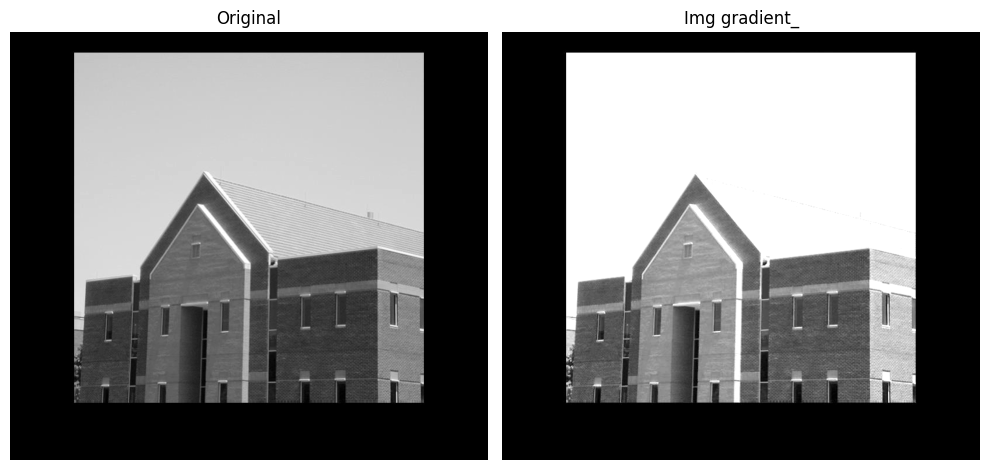

In [ ]:
img1= cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/Testbuilding.jpg',cv2.IMREAD_GRAYSCALE)

kernel_x = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,-1]],np.float32)

kernel_y = np.array([[0,0,0],
                     [0,0,1],
                     [0,-1,0]],np.float32)

# áp dụng bộ lọc Robert
grad_x = cv2.filter2D(img1, cv2.CV_64F, kernel_x)
grad_y = cv2.filter2D(img1, cv2.CV_64F, kernel_y)

# tính độ lớn của gradient
img_gradient = np.abs(grad_x) + np.abs(grad_y)

# cắt ngưỡng
threshold = np.max(img1) * 0.33
img_gradient[img_gradient < threshold] = 0


# chuẩn hóa độ lớn kết quả khoảng 0 - 255

img_gradient = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)

#chuyển đổi về unit8

img_gradient = np.uint8(img_gradient)


# làm nét ảnh
img_gradient_ = cv2.addWeighted(img1, 1.5, img_gradient, -0.5, 0)
# hiển thị kết quả

fx,ax = plt.subplots(1,2, figsize=(10,10))

ax[0].set_title('Original')
ax[1].set_title('Kết quả sau khi lọc Robert và làm nét')
ax[0].imshow(img1, cmap = 'gray')
ax[1].imshow(img_gradient_, cmap = 'gray')
ax[0].axis('off')
ax[1].axis('off')

plt.tight_layout()
plt.show()

### Prewitt filter
- Phát hiện biên

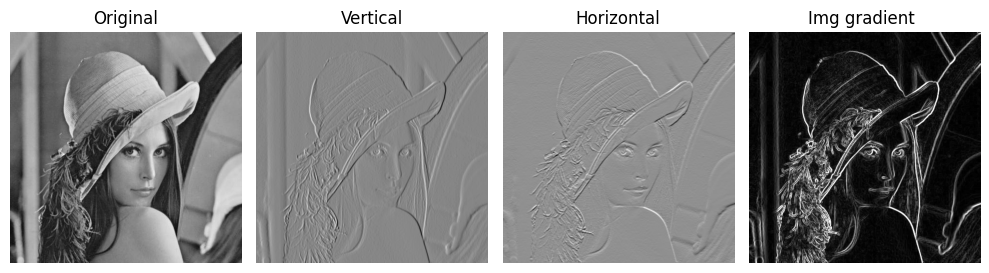

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png', 0)

x_gradient = np.array([[-1,0,1],
                       [-1,0,1],
                       [-1,0,1]])
y_gradient = np.array([[-1,-1,-1],
                       [0,0,0],
                       [1,1,1]])


prewitt_x = cv2.filter2D(img,cv2.CV_64F, x_gradient)
prewitt_y = cv2.filter2D(img, cv2.CV_64F, y_gradient)

img_gradient = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))

rs_y = np.clip(img_gradient, 0, 255)

rs_y = rs_y.astype('uint8')

fx,ax = plt.subplots(1,4, figsize=(10,5))

ax[0].set_title('Original')
ax[1].set_title('Vertical')
ax[2].set_title('Horizontal')
ax[3].set_title('Img gradient ')
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(prewitt_x,cmap = 'gray')
ax[2].imshow(prewitt_y, cmap = 'gray')
ax[3].imshow(rs_y, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()
plt.show()

Lọc Prewitt, cắt ngưỡng

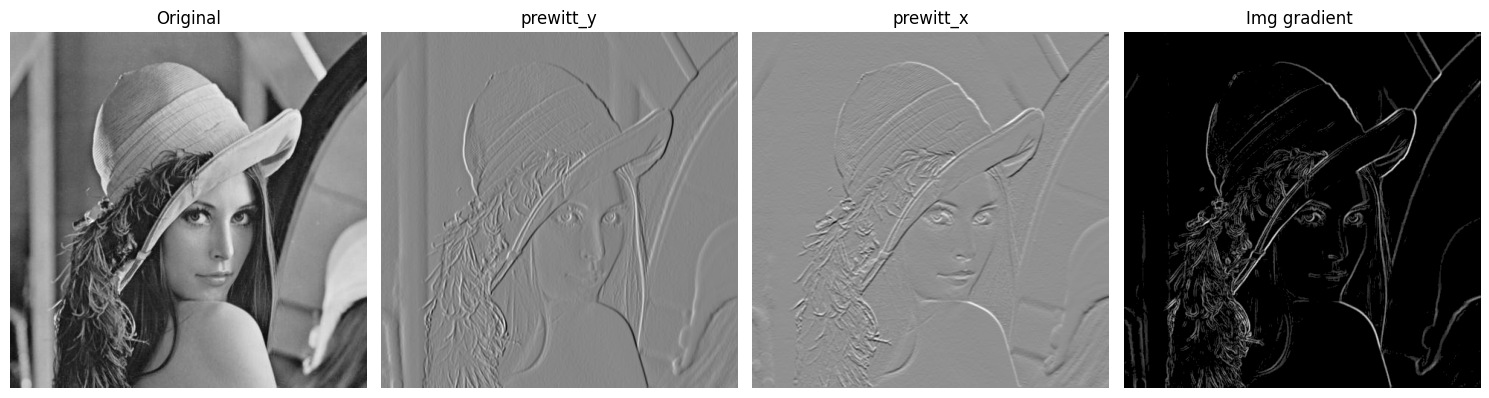

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png', 0)

x_gradient = np.array([[-1,0,1],
                       [-1,0,1],
                       [-1,0,1]])
y_gradient = np.array([[-1,-1,-1],
                       [0,0,0],
                       [1,1,1]])


prewitt_x = cv2.filter2D(img,cv2.CV_64F, x_gradient)
prewitt_y = cv2.filter2D(img, cv2.CV_64F, y_gradient)

# tính độ lớn

img_gradient = np.abs(prewitt_x) + np.abs(prewitt_y)

#cắt ngưỡng
threshold = np.max(img) * 0.33
img_gradient[img_gradient< threshold] = 0

# chuẩn hóa về khoảng 0 -255

img_gradient = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)

# chuyển về unit8

img_gradient = np.uint8(img_gradient)



#hiển thị

fx,ax = plt.subplots(1,4, figsize=(15,10))

ax[0].set_title('Original')
ax[1].set_title('prewitt_y')
ax[2].set_title('prewitt_x')
ax[3].set_title('Img gradient ')
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(prewitt_x,cmap = 'gray')
ax[2].imshow(prewitt_y, cmap = 'gray')
ax[3].imshow(img_gradient, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()
plt.show()

- Làm nét ảnh


---



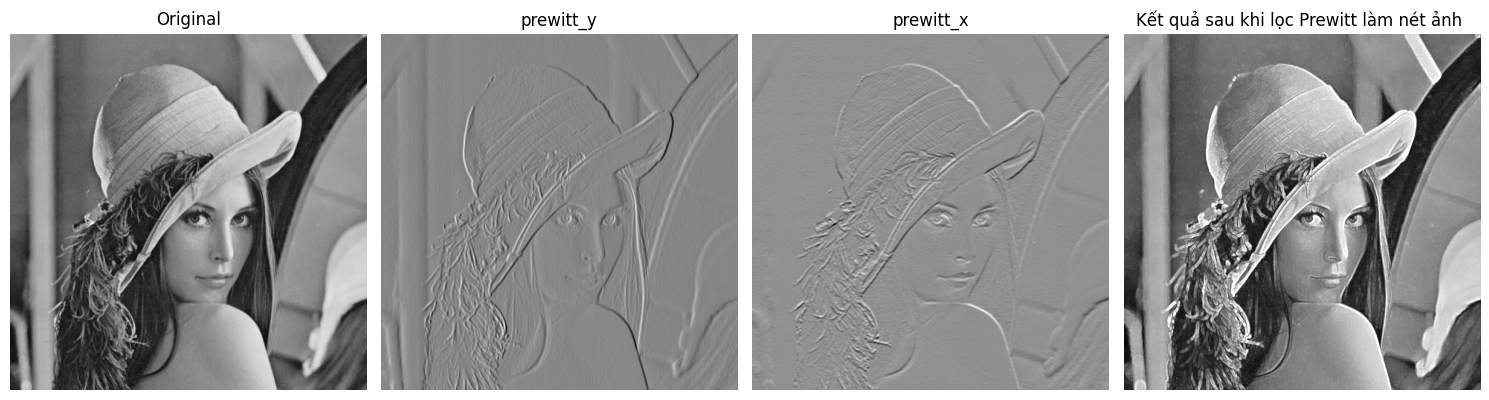

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png', 0)

x_gradient = np.array([[-1,0,1],
                       [-1,0,1],
                       [-1,0,1]])
y_gradient = np.array([[-1,-1,-1],
                       [0,0,0],
                       [1,1,1]])


prewitt_x = cv2.filter2D(img,cv2.CV_64F, x_gradient)
prewitt_y = cv2.filter2D(img, cv2.CV_64F, y_gradient)

# tính độ lớn

img_gradient = np.abs(prewitt_x) + np.abs(prewitt_y)

# chuẩn hóa về khoảng 0 -255

img_gradient = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)

# chuyển về unit8

img_gradient = np.uint8(img_gradient)

# làm nét ảnh
img_gradient_ = cv2.addWeighted(img, 1, img_gradient, 1, 0)

#hiển thị

fx,ax = plt.subplots(1,4, figsize=(15,10))

ax[0].set_title('Original')
ax[1].set_title('prewitt_y')
ax[2].set_title('prewitt_x')
ax[3].set_title('Kết quả sau khi lọc Prewitt làm nét ảnh ')
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(prewitt_x,cmap = 'gray')
ax[2].imshow(prewitt_y, cmap = 'gray')
ax[3].imshow(img_gradient_, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()
plt.show()

### Bộ lọc Sobel

- Bộ lọc sobel phát hiện biên

----

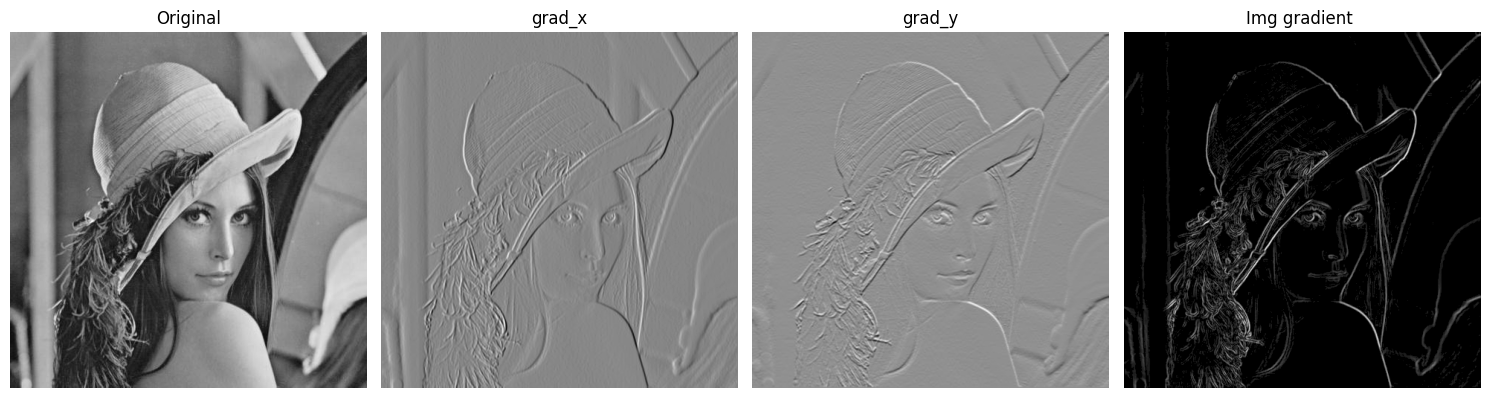

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png', 0)


kernel_x = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])
kernel_y = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])

grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

# tính độ lớn gradient

img_gradient = np.abs(grad_x) + np.abs(grad_y)

# cắt ngưỡng
threshold = np.max(img) * 0.33
img_gradient[img_gradient< threshold] = 0


# chuẩn hóa độ lớn kết quả khoảng 0 - 255

img_gradient = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)

#chuyển đổi về unit8

img_gradient = np.uint8(img_gradient)

# hiển thị

fx,ax = plt.subplots(1,4, figsize=(15,10))

ax[0].set_title('Original')
ax[1].set_title('grad_x')
ax[2].set_title('grad_y')
ax[3].set_title('Img gradient ')

ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(grad_x,cmap = 'gray')
ax[2].imshow(grad_y, cmap = 'gray')
ax[3].imshow(img_gradient, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()
plt.show()

- Bộ lọc sobel, làm nét ảnh
----

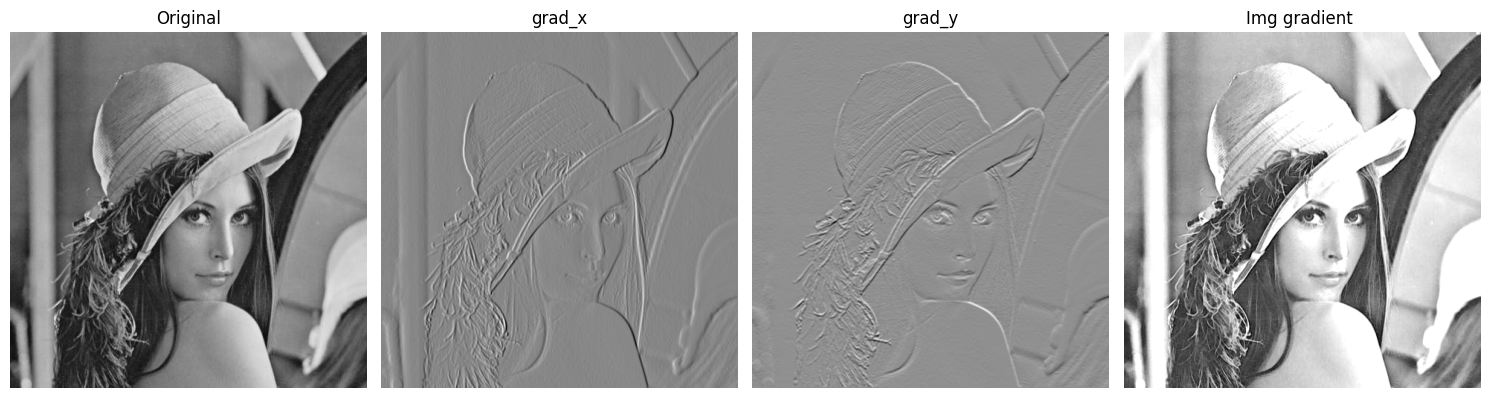

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/lena.png', 0)


kernel_x = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])
kernel_y = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])

grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

# tính độ lớn gradient

img_gradient = np.abs(grad_x) + np.abs(grad_y)

# cắt ngưỡng
threshold = np.max(img) * 0.33
img_gradient[img_gradient< threshold] = 0


# chuẩn hóa độ lớn kết quả khoảng 0 - 255

img_gradient = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)

#chuyển đổi về unit8

img_gradient = np.uint8(img_gradient)

# làm nét hình
img_gradient_ = cv2.addWeighted(img, 1.5, img_gradient, -0.5, 0)

# hiển thị

fx,ax = plt.subplots(1,4, figsize=(15,10))

ax[0].set_title('Original')
ax[1].set_title('grad_x')
ax[2].set_title('grad_y')
ax[3].set_title('Img gradient ')

ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(grad_x,cmap = 'gray')
ax[2].imshow(grad_y, cmap = 'gray')
ax[3].imshow(img_gradient_, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()
plt.show()

- Phát hiện cạnh đơn đạo hàm bậc 1 với sobel


---



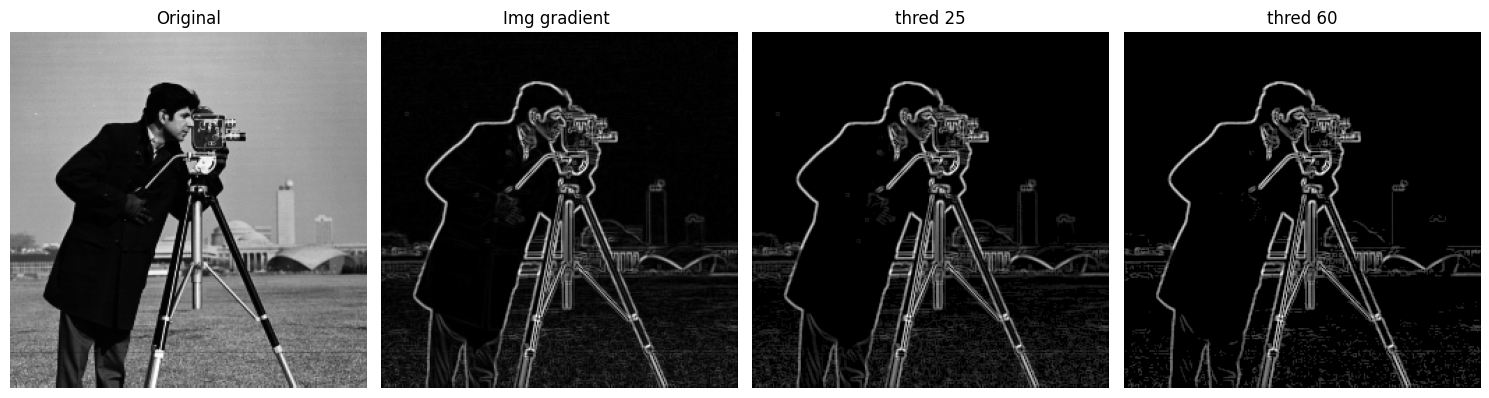

In [70]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/cameraman.png', 0)


kernel_x = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])
kernel_y = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
# áp dụng bộ lọc
grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

# tính độ lớn của gradient
img_gradient = np.abs(grad_x) + np.abs(grad_y)
img_gradient_25 = np.abs(grad_x) + np.abs(grad_y)

img_gradient_60 = np.abs(grad_x) + np.abs(grad_y)


# cắt ngưỡng
threshold = np.max(img) * 0.25
img_gradient_25[img_gradient_25< threshold] = 0

threshold_60 = np.max(img) * 0.60
img_gradient_60[img_gradient_60< threshold_60] = 0

# chuẩn hóa
img_gradient = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)
img_gradient_25 = cv2.normalize(img_gradient_25, None, 0, 255, cv2.NORM_MINMAX)
img_gradient_60 = cv2.normalize(img_gradient_60, None, 0, 255, cv2.NORM_MINMAX)

#chuyển đổi về unit8

img_gradient = np.uint8(img_gradient)
img_gradient_25 = np.uint8(img_gradient_25)
img_gradient_60 = np.uint8(img_gradient_60)



# hiển thị

fx,ax = plt.subplots(1,4, figsize=(15,10))

ax[0].set_title('Original')
ax[2].set_title('thred 25')
ax[3].set_title('thred 60')
ax[1].set_title('Img gradient ')
ax[0].imshow(img, cmap = 'gray')
ax[2].imshow(img_gradient_25,cmap = 'gray')
ax[3].imshow(img_gradient_60, cmap = 'gray')
ax[1].imshow(img_gradient, cmap = 'gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.tight_layout()
plt.show()
